In [52]:
#Create 2d conv filter
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
print("Imported Libs")

Imported Libs


In [39]:
image = img.convert("L")

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [41]:
img_tensor = transform(image).unsqueeze(0)
print(img_tensor.shape)

torch.Size([1, 1, 666, 1000])


In [ ]:
#Define conv filter
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

filter = torch.tensor([[[[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]]]], dtype=torch.float32)
conv.weight = nn.Parameter(filter)

In [ ]:
with torch.no_grad():
    output =conv(img_tensor)
print(output.shape)

torch.Size([1, 1, 664, 998])


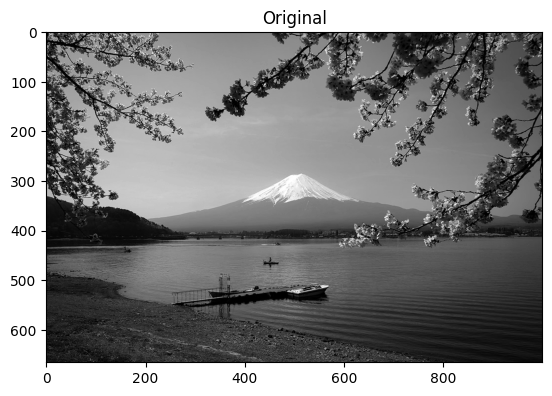

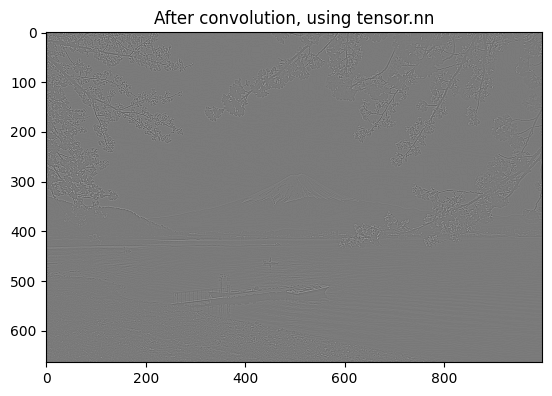

In [101]:
plt.title("Original")
plt.imshow(img_tensor.squeeze(0).squeeze(0),cmap="gray")
plt.show()
plt.title("After convolution, using tensor.nn")
plt.imshow(output.squeeze(0).squeeze(0), cmap="grey")
plt.show()

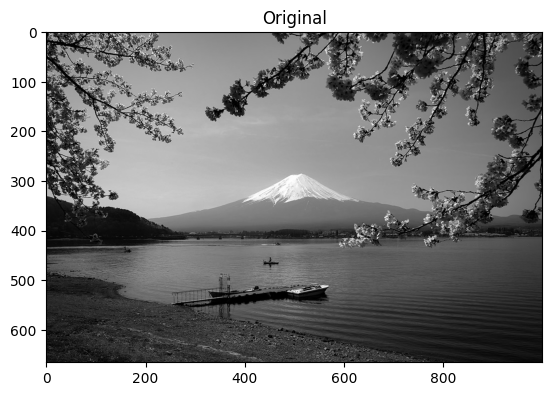

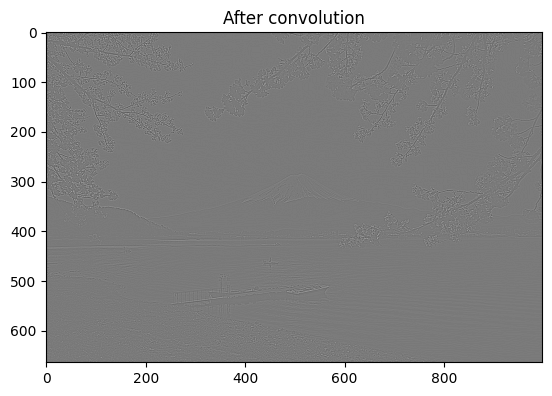

Output convolution:
 tensor([[[[-2.4314e-01, -2.0392e-01, -3.7255e-01,  ..., -9.8824e-01,
           -8.2353e-01,  3.8039e-01],
          [-3.6863e-01, -3.6078e-01, -4.5490e-01,  ..., -7.0588e-01,
            6.7059e-01,  4.5490e-01],
          [-2.6667e-01, -1.1765e-01, -8.6275e-02,  ...,  7.5294e-01,
            2.9412e-01, -8.6275e-02],
          ...,
          [ 2.0392e-01,  9.8039e-02, -7.4510e-02,  ...,  6.2745e-02,
            3.1373e-02,  7.4506e-09],
          [ 4.3137e-02,  2.7451e-02, -2.3922e-01,  ..., -3.1373e-02,
           -2.3529e-02,  1.9608e-02],
          [-1.1765e-02, -1.1765e-02, -1.6078e-01,  ...,  1.1765e-02,
            1.1765e-02, -2.3529e-02]]]])


In [102]:


def cov2d (image, kernel):
    """
    Manual implemntation of 2 dimensional convolution filter on a real image
    Example given: Mt. Fuji image with edge detection operation
    
    Args:
    image = image to be processed as PIL
    kernel = kernel to apply to image

    """
    
    if isinstance(image, Image.Image):
        image = image.convert("L")
        img_array = np.array(image, dtype=np.float32)
    else:
        img_array = np.array(image, dtype=np.float32)
    
    if 'torch' in str(type(kernel)):
        kernel = kernel.squeeze().numpy()
    
    kernel = np.flipud(np.fliplr(kernel))
    #image= image.convert("L")
    #transform = transforms.Compose([transforms.ToTensor()])
    #image_tensor = transform(image).unsqueeze(0)
    
    #initalise image and kernel dimensions
    iH, iW = img_array.shape
    kH, kW = kernel.shape
    
    #initalise output dimensions (image-kernel +1)
    oH = iH-kH + 1
    oW = iW-kW + 1
    
    output = np.zeros((oH, oW))
    
    #sliding operation using dor product of kernel and submatrix
    for i in range(oH):
        for j in range(oW):
            reigon = img_array[i:i+kH, j:j+kW]
            output[i,j] = np.sum(reigon * kernel)
    
    
    return output
    
# Insert image and kernel
img = Image.open("im1.jpg")
    
kernel = torch.tensor([[[-1, -1, -1],
                        [-1, 8, -1],
                         [-1, -1, -1]]], dtype=torch.float32)

cov2d(image, kernel)

#plots
plt.title("Original")
plt.imshow(np.array(img), cmap="gray")
plt.show()

plt.title("After convolution")
plt.imshow(output.squeeze(0).squeeze(0), cmap="gray")
plt.show()

#print output matrix
print("Output convolution:\n", output)
    